In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from plotly import tools
import plotly_express as px
from plotly.offline import init_notebook_mode,iplot,plot
import plotly.figure_factory as ff
import plotly.graph_objs as go
import ast

In [3]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
df.head(1).transpose()

,0
customerID,7590-VHVEG
gender,Female
SeniorCitizen,0
Partner,Yes
Dependents,No
tenure,1
PhoneService,No
MultipleLines,No phone service
InternetService,DSL
OnlineSecurity,No


In [5]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df["TotalCharges"] = df["TotalCharges"].replace(' ', 0)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


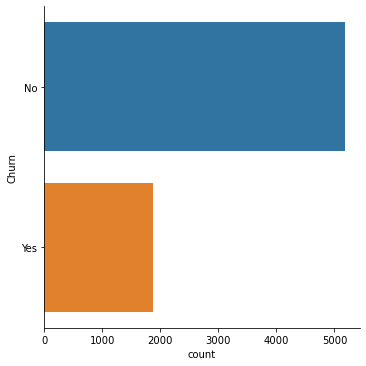

In [10]:
sns.catplot(data=df,y="Churn",kind="count")

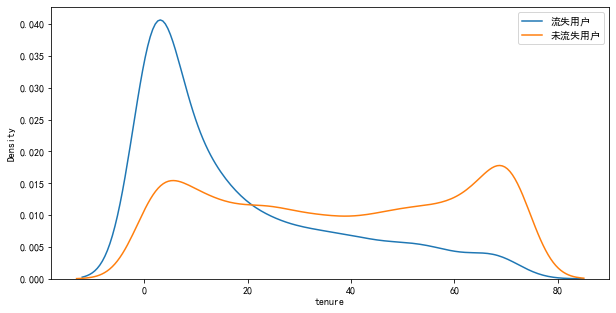

In [13]:
fig1 = plt.figure(figsize=(10,5))
plt.rcParams["font.sans-serif"] = "SimHei"
sns.kdeplot(df[df["Churn"]=="Yes"]["tenure"],label="流失用户")
sns.kdeplot(df[df["Churn"]=="No"]["tenure"],label="未流失用户")
plt.legend()

In [15]:
def show_ked_for_feature(feat):
    fig1 = plt.figure(figsize=(10,5))
    plt.rcParams["font.sans-serif"] = "SimHei"
    sns.kdeplot(df[df["Churn"]=="Yes"][feat],label="流失用户")
    sns.kdeplot(df[df["Churn"]=="No"][feat],label="未流失用户")
    plt.legend()

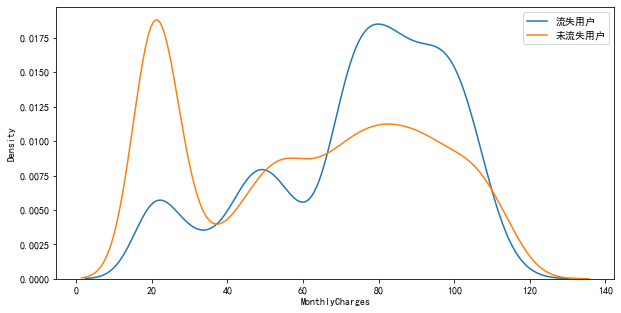

In [16]:
show_ked_for_feature("MonthlyCharges")

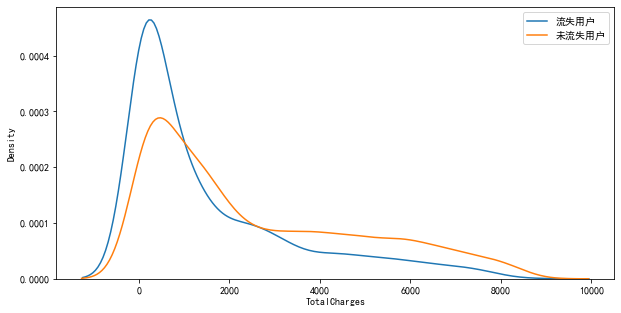

In [17]:
show_ked_for_feature("TotalCharges")

<AxesSubplot:xlabel='Dependents', ylabel='count'>

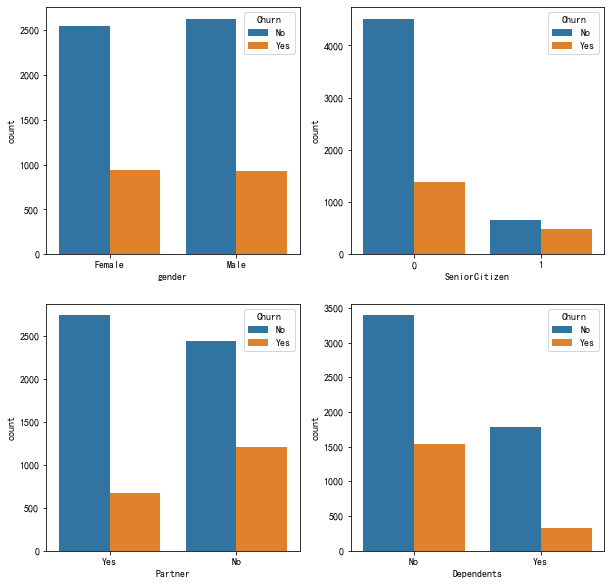

In [19]:
fig = plt.figure(figsize=(10,10))
fig.add_subplot(2,2,1)
sns.countplot(data=df,x="gender",hue="Churn")
fig.add_subplot(2,2,2)
sns.countplot(data=df,x="SeniorCitizen",hue="Churn")
fig.add_subplot(2,2,3)
sns.countplot(data=df,x="Partner",hue="Churn")
fig.add_subplot(2,2,4)
sns.countplot(data=df,x="Dependents",hue="Churn")

In [20]:
df_feature = df[["SeniorCitizen", "Partner", "Dependents", "tenure", "PhoneService","MultipleLines","InternetService", "OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV","StreamingMovies","PaperlessBilling","PaymentMethod","Churn"]]
df_feature

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Churn
0,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,No
1,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,No
2,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,Yes
3,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),No
4,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes,Mailed check,No
7039,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes,Credit card (automatic),No
7040,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Yes,Electronic check,No
7041,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Yes,Mailed check,Yes


In [22]:
object_colums = df_feature.select_dtypes(['object'])

In [25]:
encoder = LabelEncoder()
for item in object_colums:
    df_feature[item] = encoder.fit_transform(df_feature[item])

In [26]:
df_feature

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,Churn
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,34,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,45,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,0,24,0,0,0,0,0,0,0,0,0,0,0,0
7039,0,0,0,72,0,0,0,0,0,0,0,0,0,0,0,0
7040,0,0,0,11,0,0,0,0,0,0,0,0,0,0,0,0
7041,1,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
classifier = RandomForestClassifier(n_estimators=30,oob_score=True,n_jobs=-1,random_state=50,max_features="auto",min_samples_leaf=50)
classifier.fit(df_feature.drop(columns="Churn"),df_feature["Churn"])
score = classifier.score(df_feature.drop(columns="Churn"),df_feature["Churn"])
print(score)

1.0


In [31]:
prediction = classifier.predict(df_feature.drop(columns="Churn"))
prediction

array([0, 0, 0, ..., 0, 0, 0])

In [32]:
pd.Series(precision_score).value_counts()

<function precision_score at 0x000001E079226550>    1
dtype: int64

In [33]:
accuracy = accuracy_score(df_feature.Churn.values,prediction)
recall = recall_score(df_feature.Churn.values,prediction)
precision = precision_score(df_feature.Churn.values,prediction)
print("准确率：",accuracy)
print("汇报率",recall)
print("查准率",precision)

准确率： 1.0
汇报率 0.0
查准率 0.0


D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.

D:\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.



使用 Series 的replace方法来批量替换 Series 中的字符串的值；

使用 pd_tonumeric 来将 object 类型的字段转换为数值型；

使用 sns.catlot 来查看布尔值的分布比例；

使用 sns.kdeplot 配合 dataframe 的条件选择，来查看流失与不流失用户在其他字段上的分布特征；

使用 df.select_dtypes 来选择出某个数据类型的字段；

使用 RandomForestClassifier 来建立分类模型。